# Pacific Ocean Salinity Prediction Project

## 1. Project Definition

### 1.1 Author: Richard Mfitumukiza

### 1.2 Goals
The  California Cooperative Oceanic Fisheries Investigations (CalCOFI) data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. The file contains data collected at depths down to 500m which include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

**The goal of this project is to learn how to use machine learning in ecosystem and biodiversity management; by predicting ocean salinity level based on historical data.**


### 1.3 Objectives
The objective is to use Machine Learning to create a model that predicts pacific ocean salinity level; based on the dataset  available on [Kaggle](https://www.kaggle.com/sohier/calcofi).  

### 1.4 Requirements
I am required to:
- use Kaggle [dataset](https://www.kaggle.com/sohier/calcofi),
- create a machine learning model,
- run a prediction on dataset

---

## 2. Project Planning Summary

### 2.1 Work breakdown
- use Kaggle [dataset](https://www.kaggle.com/sohier/calcofi),
    - Download dataset from kaggle.com to local machine
    - Prepare dataset and make it ready for usage in subsequent steps
- create a machine learning model,
    - Exploratory Data Analysis
        - Raw data exploration
        - Feature engineering
        - Analysis
    - Machine Learning Modelling
        - Split into train, validate, test sets
        - train models
        - neural network models
        - ensemble models
- run a prediction on the dataset

### 2.2 Resources identification
- Links
    - context: https://www.kaggle.com/sohier/calcofi
    - dataset: https://www.kaggle.com/sohier/calcofi

---

## 3. Execution : Data science

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import operator

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Matplotlib version:',mpl.__version__)
print('Seaborn version:',sns.__version__)
#print('Bokeh version:',np.__version__)
print('sklearn version:',np.__version__)

STATE = 2022

Numpy version: 1.20.3
Pandas version: 1.2.3
Matplotlib version: 3.2.2
Seaborn version: 0.11.2
sklearn version: 1.20.3


### Load Data

In [2]:
# Data credits: https://www.kaggle.com/sohier/calcofi
url = "https://www.dropbox.com/s/cw853brhdw7hilp/bottle.csv?dl=1"
local_bottles_file = 'bottle.csv'
salinity_df = pd.read_csv(local_bottles_file)

In [3]:
salinity_df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

### Statistical Summary

In [4]:
# Select a random subset from the complete dataset
salinity_df = salinity_df.iloc[1:150000]
salinity_df.rename(columns={'Salnty':'salinity'}, inplace=True)
salinity_df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,salinity,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,149999.000000,149999.000000,149999.000000,145392.000000,117591.000000,128474.000000,115078.000000,102277.000000,102277.000000,0.0,...,0.0,0.0,149999.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2604.606897,75001.000000,324.759678,9.513042,33.874505,2.879955,26.042581,48.096165,127.067193,NaN,...,NaN,NaN,327.243428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1610.368969,43301.125851,370.746417,4.392547,0.508465,2.145869,1.063962,37.726776,93.779254,NaN,...,NaN,NaN,374.387344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2.000000,0.000000,1.540000,30.250000,0.000000,21.713000,0.000000,0.000000,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1212.000000,37501.500000,50.000000,5.940000,33.480000,0.650000,25.125000,9.500000,29.152720,NaN,...,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2508.000000,75001.000000,178.000000,8.860000,33.964000,2.540000,26.317000,39.400000,112.698300,NaN,...,NaN,NaN,179.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3927.000000,112500.500000,500.000000,12.470000,34.322000,5.170000,26.948000,89.900000,227.461000,NaN,...,NaN,NaN,503.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5676.000000,150000.000000,3762.000000,28.540000,35.280000,8.710000,28.083000,143.400000,380.014900,NaN,...,NaN,NaN,3818.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning
Cleaning up the NULL and duplicate values in the dataset:
1. Check for NULL percentages
2. Drop attributes with more than 30% data missing
3. Fill remaining NULLs with mean values
4. Re-check NULL Percentages
5. Check for duplicates

Check for NULL percentages

In [5]:
nulls = salinity_df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(salinity_df)*100,2)

salinity_df_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
salinity_df_null.Attr  = nulls.index
salinity_df_null.Total = nulls.values
salinity_df_null.Percent = prcet.values
print(salinity_df_null.head(20))

                   Attr   Total  Percent
0   DIC Quality Comment  149999    100.0
1                  DIC1  149999    100.0
2                SiO3uM  149999    100.0
3                 NO2uM  149999    100.0
4               R_PHAEO  149999    100.0
5                 NO3uM  149999    100.0
6                R_CHLA  149999    100.0
7                 NH3uM  149999    100.0
8                 R_NH4  149999    100.0
9                C14As1  149999    100.0
10               C14A1p  149999    100.0
11                R_NO2  149999    100.0
12               C14As2  149999    100.0
13               C14A2p  149999    100.0
14                R_NO3  149999    100.0
15               DarkAs  149999    100.0
16               DarkAp  149999    100.0
17               MeanAs  149999    100.0
18               MeanAp  149999    100.0
19               R_SIO3  149999    100.0


Drop attributes with more than 30% data missing

In [6]:
for i in salinity_df_null.Attr[salinity_df_null['Percent'] > 30]:
    salinity_df = salinity_df.drop([i], axis=1)

Fill remaining NULLs with mode values

In [7]:
for i in salinity_df.columns:
    if salinity_df[i].isnull().sum() > 0:
        salinity_df[i].fillna(salinity_df[i].mode().mean(), inplace=True)

Re-check NULL Percentages

In [8]:
nulls = salinity_df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(salinity_df)*100,2)

salinity_df_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
salinity_df_null.Attr  = nulls.index
salinity_df_null.Total = nulls.values
salinity_df_null.Percent = prcet.values
print(salinity_df_null.head())

      Attr  Total  Percent
0  Cst_Cnt      0      0.0
1  Btl_Cnt      0      0.0
2     R_O2      0      0.0
3  R_DYNHT      0      0.0
4    R_SVA      0      0.0


Check for Duplicated values

In [9]:
print('COUNT OF DUPLICATES:  {}'.format(salinity_df.duplicated().sum()))

COUNT OF DUPLICATES:  0


### Drop columns that cannot be Normalized 
* Cst_Cnt Auto-numbered Cast Count
* Btl_Cnt Auto-numbered Bottle count
* Sta_ID CalCOFI Line and Station
* Depth_ID [Century]-[YY][MM][ShipCode]

In [10]:
drop_cols = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm',]
salinity_df_norm = salinity_df.drop(drop_cols, axis=1)  #  data for normalization
salinity_df_scale = salinity_df_norm.copy(deep=True)    #  backup data

Normalization

In [11]:
salinity_df_scale = StandardScaler().fit_transform(salinity_df_scale)

#  create dataframe
salinity_df_norm = pd.DataFrame(salinity_df_scale, index=salinity_df_norm.index, columns=salinity_df_norm.columns)

### Correlation of features with Salinity

In [12]:
salinity_df_norm.corr()

#  Drop columns with mode = "0.0".  No impact on correlation
print('Columns with mode:0')
for i in salinity_df_norm.columns.tolist():
    if (salinity_df_norm[i].mode()[0] == 0.0):
        print(' - ',i,salinity_df_norm[i].mode()[0])
        salinity_df_norm = salinity_df_norm.drop(i,axis=1)

#  Create correlation dataframe
print()
print('Correlation dataframe')
salinity_df_corr = pd.DataFrame(columns=['Attributes','Correlation'])
salinity_df_corr.Attributes = salinity_df_norm.corr()['salinity'].sort_values(ascending=False).index
salinity_df_corr.Correlation = salinity_df_norm.corr()['salinity'].sort_values(ascending=False).values
print(salinity_df_corr)

Columns with mode:0
 -  P_qual 0.0
 -  Chlqua 0.0
 -  Phaqua 0.0
 -  SiO3qu 0.0
 -  NO2q 0.0
 -  NO3q 0.0
 -  NH3q 0.0
 -  C14A1q 0.0
 -  C14A2q 0.0
 -  DarkAq 0.0
 -  MeanAq 0.0

Correlation dataframe
    Attributes  Correlation
0     salinity     1.000000
1   R_SALINITY     0.988342
2       STheta     0.801297
3      R_SIGMA     0.798108
4      R_Depth     0.558394
5       R_PRES     0.557899
6      R_DYNHT     0.368071
7       S_prec     0.272398
8       RecInd     0.096597
9       T_prec    -0.008383
10      T_degC    -0.512014
11      R_TEMP    -0.512014
12    R_POTEMP    -0.597879
13      O2ml_L    -0.672932
14        R_O2    -0.672932
15       R_SVA    -0.795032


### Feature selection based on correlation with 'Salinity'

In [13]:
salinity_df_norm = salinity_df_norm[['STheta','R_SIGMA','R_Depth','R_DYNHT','S_prec','RecInd','T_degC','O2ml_L','salinity']]

x = salinity_df_norm.iloc[:,:-1]
y = salinity_df_norm['salinity']

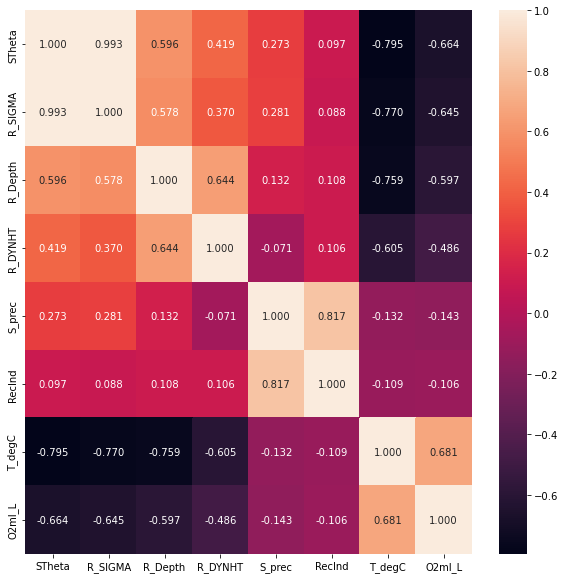

In [14]:
# Correlation matrix
corr = x.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

- **Explain multicollinearity:** multicollinearity is the occurrence of correlation between two or more independent variables  
- **Effects on the model:** multicollinearity can lead to misleading results, skewed results and unreliable results  
- **Solving the multicollinearity problem:** identify  and leave one correlated independed variables for each group of correlated variables.  

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series(
    [variance_inflation_factor(x.values, i) for i in range(x.shape[1])],
    index=x.columns)

STheta     101.462102
R_SIGMA     92.896917
R_Depth      2.946138
R_DYNHT      2.541414
S_prec       4.704880
RecInd       4.159560
T_degC       4.818564
O2ml_L       2.117853
dtype: float64

In [16]:
x.drop('R_SIGMA', axis=1, inplace=True)
x.head()

,STheta,R_Depth,R_DYNHT,S_prec,RecInd,T_degC,O2ml_L
1,-0.624622,-0.854387,-0.901827,-1.257636,-1.027423,0.225308,-0.976462
2,-0.626518,-0.848992,-0.880146,0.795142,0.973309,0.225308,-0.976462
3,-0.636945,-0.824717,-0.836785,-1.257636,-1.027423,0.222997,-0.976462
4,-0.636945,-0.822019,-0.836785,0.795142,0.973309,0.222997,-0.976462
5,-0.629362,-0.795047,-0.771743,0.795142,0.973309,0.222997,-0.976462


In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

### Model building

In [18]:
def rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [19]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)
test_r2 = linear_regressor.score(X_test, y_test)
print('R2 Score:', test_r2)
print('RMSE:', rmse(y_test, y_pred))

R2 Score: 0.8112948100962617
RMSE: 0.43093618771375974


In [20]:
for i in range(1, X_train.shape[1]):
    print(f'{i} features')
    rfe = RFE(LinearRegression(), n_features_to_select=i, step=1) # incrementing number of features
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    # test_r2 = rfe.score(X_test, y_test)
    test_r2 = cross_val_score(rfe, X_test, y_test, cv=5) # cross validating
    print('R2 Score:', test_r2)
    print(f'RMSE: {rmse(y_test, y_pred)}\n')



1 features
R2 Score: [0.62676026 0.63890046 0.66107875 0.63276999 0.6487546 ]
RMSE: 0.5936400718861823

2 features
R2 Score: [0.66785335 0.67797504 0.70034846 0.6738132  0.69172931]
RMSE: 0.5589752139208793

3 features
R2 Score: [0.74802408 0.75197073 0.76664261 0.74734103 0.76376117]
RMSE: 0.4903884826419779

4 features
R2 Score: [0.80606471 0.80219861 0.81541729 0.80575328 0.81475436]
RMSE: 0.4337756230958877

5 features
R2 Score: [0.80682603 0.80286982 0.81742937 0.80765068 0.81619996]
RMSE: 0.43222063081973944

6 features
R2 Score: [0.80758445 0.80374365 0.81792438 0.80833278 0.81642054]
RMSE: 0.43154798552845935



In [21]:

rfecv = RFECV(
    estimator=LinearRegression(),
    min_features_to_select=2,
    step=1,
    scoring="r2",
    cv=5
)

rfecv.fit(X_train, y_train)
y_pred = rfecv.predict(X_test)

test_r2 = rfecv.score(X_test, y_test)

print(f'cross validation R2 scores: {rfecv.grid_scores_}')

cross validation R2 scores: [0.68503775 0.75973327 0.81193123 0.81351355 0.81394542 0.81422489]


###     i. Gradient Boosting Regressor (3 marks)

In [22]:
gbr_model = GradientBoostingRegressor(random_state=STATE)
parameters = {
    'n_estimators':np.arange(1,200,50)
}

gbr_gscv = GridSearchCV(estimator=gbr_model, param_grid=parameters, cv=5)
gbr_gscv.fit(X_train, y_train)
gbr_model = gbr_gscv.best_estimator_
gbr_model

GradientBoostingRegressor(n_estimators=151, random_state=2022)

In [23]:

gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)

test_r2 = gbr_model.score(X_test, y_test)
print('R2 Score:', test_r2)
print('RMSE:', rmse(y_test, y_pred))

R2 Score: 0.9695056549783737
RMSE: 0.1732330285061775


### ii. Random Forest Regressor (3 marks)

In [24]:
# fit random forest model
rfr_model = RandomForestRegressor(random_state=STATE)
rfr_model

parameters = {
    'n_estimators':np.arange(1,200,50)
}

rfr_gscv = GridSearchCV(estimator=rfr_model, param_grid=parameters, cv=5)
rfr_gscv.fit(X_train, y_train)
rfr_model = rfr_gscv.best_estimator_
rfr_model

RandomForestRegressor(n_estimators=101, random_state=2022)

In [25]:
rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)

test_r2 = rfr_model.score(X_test, y_test)
print('R2 Score:', test_r2)
print('RMSE:', rmse(y_test, y_pred))

R2 Score: 0.9904257262924633
RMSE: 0.09706752639037065


### iii. ADA Boost Regressor (3 marks)

In [26]:
abr_model = AdaBoostRegressor(random_state=STATE)
abr_model

parameters = {
    'n_estimators':np.arange(1,200,50)
}

abr_gscv = GridSearchCV(estimator=abr_model, param_grid=parameters, cv=5)
abr_gscv.fit(X_train, y_train)
abr_model = abr_gscv.best_estimator_
abr_model

AdaBoostRegressor(n_estimators=51, random_state=2022)

In [27]:
abr_model.fit(X_train, y_train)
y_pred = abr_model.predict(X_test)

test_r2 = abr_model.score(X_test, y_test)
print('R2 Score:', test_r2)
print('RMSE:', rmse(y_test, y_pred))

R2 Score: 0.8094275752459686
RMSE: 0.43306299284773875


### Production

In [28]:
rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)

test_r2 = rfr_model.score(X_test, y_test)
print('R2 Score:', test_r2)
print('RMSE:', rmse(y_test, y_pred))

R2 Score: 0.9904257262924633
RMSE: 0.09706752639037065


Random Forest Regressor performed the best. Because it is bootstrapping and aggregating, instead of boosting.